
***
<h1 id="heading"><center><span style="background-color:#5642C5; color:white ; display:fill;border-radius:5px; font-family:cursive"> 1. Web Scriping project : List of highest-grossing mobile games 🗃️📊🔬</span></center><a class="anchor-link" href="">¶</a></h1>
<p><center style="color:#159364; font-family:cursive;">💬 The best way to make yourself extremely <code>valuable</code> in a team is to <code>understand</code> everything, but being a <code>master</code> of something.</center></p>

***


<h3 id="heading"><span style="background-color:#cefffb; color:#1b4946; display:fill;border-radius:5px; font-family:cursive"> 👨‍💻 Description of the author </span></h3>

* Font-Family: Georgia, Verdana, Cursive https://blog.hubspot.com/website/web-safe-html-css-fonts
* Colors Used: ['crimson', 'orange', #5642C5, #62d6cc, #50b5e7, #e7b550] https://htmlcolorcodes.com/fr/
* Emoji Used: [📚, 📌, 😃, 💬, 🎖, 📎, 🏆, 🗣, 🔭, 🌈, 💭, ⏳, 🙌🏻]<br>
* Social Media Contact:
    *  [WebPage](https://eljayiyassir.github.io/Portfolio/)
    *  [Github](https://github.com/EljayiYassir)
    *  [LinkedIn](https://www.linkedin.com/in/yassir-eljayi/)

<h3 id="heading"><span style="background-color:#cefffb; color:#1b4946; display:fill;border-radius:5px; font-family:cursive"> 📝 Description of the Project </span></h3>

<h3 id="heading"><span style="background-color:#cefffb; color:#1b4946 ; display:fill;border-radius:5px; font-family:cursive"> 📥 Import packages & URL </span></h3>

In [142]:
FIG_DIR = '/home/saitama/projects portfolio/2 Web scraping/image'

In [146]:
# packages webscraping
import requests
from bs4 import BeautifulSoup

# Load packages
import pandas as pd 
import numpy as np
import logging
import pickle
import os


import plotly 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

from matplotlib import pyplot as plt

In [2]:
URL = "https://vgsales.fandom.com/wiki/List_of_highest-grossing_mobile_games"

<h3 id="heading"><span style="background-color:#cefffb; color:#1b4946 ; display:fill;border-radius:5px; font-family:cursive"> 📤 Send Request to Web page </span></h3>

In [3]:
response = requests.get(URL)
if response.status_code == 200:
    print("Request successful!")
else:
    print(f"Request failed with status code: {response.status_code}")

Request successful!


In [4]:
# use different parser like 'html.parser' 'lxml'
soup = BeautifulSoup(response.text, 'lxml')

<h4 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">2. 🗄️ Columns have problem </span></h4>

In [28]:
# Find a the table that contain all the info by tag and class
table = soup.find('table', class_="wikitable sortable static-row-numbers", style="text-align:center; font-size:85%")

# Extract headers of the table content
headers = table.find_all('th')
titles = []
for i in headers:
    title = i.text
    # append the titles in the headers without whitespaces or new line
    titles.append(title.replace('\n', ''))
print(titles)
# text_content


['Rank', 'Game title', 'Revenue', 'Initial release', 'Publisher(s)', 'Genre(s)', 'Ref']


<div style="display:fill;
           border-radius:5px;
           background-color:#ffdbdb;;
           font-family:Georgia;">

<p 
    <span style="padding: 6px;
          color:#aa0c0c;">
📌 Let creat a dataFrame for the content of the table.
</p>
</div>

In [42]:
# Let create a Dataframe for our content from the web
df = pd.DataFrame(columns=titles)
df

,Rank,Game title,Revenue,Initial release,Publisher(s),Genre(s),Ref


<div style="display:fill;
           border-radius:5px;
           background-color:#ffdbdb;;
           font-family:Georgia;">

<p 
    <span style="padding: 6px;
          color:#aa0c0c;">
📌 Remark that the Dataframe "df" is empty which have lenght of 0 so if we add a row for each itteration in the for loop the lenght of df start increasing which we can add other row element after.
</p>
</div>

In [48]:
print(df.shape)

(16, 7)


In [54]:
rows = table.find_all('tr')
for row in rows[1:]:
    values = row.find_all('td')
    data = [value.text.replace('\n', '') for value in values]
    indice = len(df)
    if len(data) == 7:
        # add the row data to the DataFrame using loc function
        df.loc[indice] = data
        rank = data[0]
    else:
        df.loc[indice] = [rank] + data

In [58]:
df.tail(10)

,Rank,Game title,Revenue,Initial release,Publisher(s),Genre(s),Ref
422,90,Mahjong Soul,"$150,000,000",November 2019,Yostar,Board game (Mahjong),[105]
423,91,Slotomania,"$149,000,000","November 7, 2011",Playtika,Simulation (Slot),[106]
424,92,NBA Live Mobile,"$140,000,000","July 6, 2016",EA Sports (Electronic Arts),Sports (basketball),[107]
425,93,White Cat Project,"$134,000,000","July 14, 2014",Colopl,Action RPG,[n 32]
426,94,BanG Dream! Girls Band Party!,"$124,050,000","March 16, 2017",Bushiroad,Rhythm / Adventure,[n 33]
427,95,CSR Racing 2,"$121,500,000","June 29, 2016",NaturalMotion (Zynga),Racing,[75]
428,96,One Piece: Burning Will,"$117,000,000","September 20, 2018",Bandai Namco / Alibaba Group,RPG,[55]
429,97,One Piece: The Road of the Strong,"$113,840,000","January 15, 2016",CMGE,DCCG,[n 34]
430,98,Yahtzee With Buddies,"$113,000,000","November 1, 2017",Scopely,Board game,[12]
431,99,Dragon Quest Tact,"$111,990,000","July 16, 2020",Square Enix,Tactical RPG,[111][112]


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             432 non-null    object
 1   Game title       432 non-null    object
 2   Revenue          432 non-null    object
 3   Initial release  432 non-null    object
 4   Publisher(s)     432 non-null    object
 5   Genre(s)         432 non-null    object
 6   Ref              432 non-null    object
dtypes: object(7)
memory usage: 27.0+ KB


<span style="font-family:cursive;
             color:#ff9d91">From the info above we can see two major problems:👨‍💻</span>
- [x] We have many missing values from different columns
- [x] We have some columns that need to be integers or floats but insted they have object type (which mean string)

,Rank,Game title,Revenue,Initial release,Publisher(s),Genre(s),Ref
0,1,Honor of Kings (Arena of Valor),"$16,184,000,000","November 26, 2015",Tencent Games,MOBA,[n 1]
1,2,Monster Strike,"$10,501,921,723","August 8, 2013",Mixi,Puzzle / RPG / Strategy,[n 2]
2,3,PUBG Mobile,"$10,000,000,000","March 19, 2018",Tencent Games / Krafton / VNG Games,Battle royale,[14]
3,4,Puzzle & Dragons,"$8,578,340,000","February 20, 2012",GungHo Online Entertainment,RPG / Puzzle,[n 3]
4,5,Clash of Clans,"$8,400,000,000","August 2, 2012",Supercell (Tencent),Strategy,[20]


In [60]:
df['Rank'] = df['Rank'].astype(int)

In [69]:
unique df['Genre(s)'].unique()

['MOBA' 'Puzzle / RPG / Strategy' 'Battle royale' 'RPG / Puzzle'
 'Strategy' 'Augmented reality' 'Puzzle' 'RPG' 'MMORPG' 'GCS / MMO'
 'Action RPG' 'Casual / Casino' 'Real-time strategy' 'Puzzle / Decoration'
 'Strategy / MMO' 'Sports (baseball)' 'Simulation / Social'
 'Strategy (4X)' 'Fighting' 'Shooter / Battle royale' 'Simulation'
 'TBS / MMO' 'Tactical RPG' 'Racing (Kart / MMOR)' 'Simulation (CMS)'
 'ARPG / Hack & slash' 'DCCG' 'Real Time Strategy' 'DCCG / Rhythm'
 'Strategy MMORPG' 'Sandbox / Survival' 'Tactical FPS' 'Online Bingo'
 'Sports (pool)' "Shoot 'em up / RPG" 'Physics / Puzzle'
 'Sports (association football)' 'Digital collectible card game'
 'Racing (Kart)' 'Simulation (Social)' 'Puzzle / RPG'
 'Strategy (auto battler)' 'Puzzle / Strategy' 'Board game (Mahjong)'
 'Simulation (Slot)' 'Sports (basketball)' 'Rhythm / Adventure' 'Racing'
 'Board game']


<div style="display:fill;
           border-radius:5px;
           background-color:#ffdbdb;;
           font-family:Georgia;">

<p 
    <span style="padding: 6px;
          color:#aa0c0c;">
📌 Let creat a function that split column which have multiple values such that genre and publisher.
</p>
</div>

In [194]:
def split_columns(column_serie, separator='/'):
    """
    Split multiple genre in a single string 
    to a list of single strings each representing a single genre 
    
    Parameters:
    * column_serie (pd.Series): string series with multiple answers
    * separator (str): string to use as a separator
    
    Returns: (pd.Series) contains a series of lists
    """
    
    # Sub-function checking if they are multiple answers
    def multi_value_checker(pd_series, separator):
        """ Check if the answer can be split by the separator - Returns boolean """
        return pd_series.str.contains(pat=separator)
    
    # Sub-function split each answer
    def split_column(pd_series, separator):
        """ Split the string value by the separator - return list """
        return pd_series.str.split(separator)

    # Sub-function to clean strings (strip and remove newline characters)
    def clean_strings(pd_series):
        """ Clean strings by stripping and removing newline characters """
        def clean_string(string):
            if isinstance(string, str):
                return string.strip().replace('\n', '')
            return string
        return pd_series.apply(clean_string)

    # Clean the column_serie strings
    column_cleaned = clean_strings(column_serie)
    
    # Check if the column_cleaned is splitable
    val_splitable = multi_value_checker(column_cleaned, separator)
    if not val_splitable.any():
        return column_cleaned
        
    # If val_splitable.any() is True then split the column
    column_splited = split_column(column_cleaned, separator)
                                  
    # Replace the empty value by an empty list
    null_answers_bool = column_splited.isnull()
    column_splited.loc[null_answers_bool] = column_splited.loc[null_answers_bool].apply(lambda x: [])
    
    return column_splited


In [195]:
raw_df = df.copy()

In [196]:
# Select all the column that have type object and split them if its possible
# COLUMNS_SPLIT = raw_df.select_dtypes('object').columns.to_list()

# Select manually the targeted columns: Genere(s) and Publisher(s)
COLUMNS_SPLIT = ['Genre(s)', 'Publisher(s)']
for column in COLUMNS_SPLIT:
    raw_df[column] = split_columns(raw_df[column],'/')


In [197]:
raw_df.head()

,Rank,Game title,Revenue,Initial release,Publisher(s),Genre(s),Ref
0,1,Honor of Kings (Arena of Valor),"$16,184,000,000","November 26, 2015",[Tencent Games],[MOBA],[n 1]
1,2,Monster Strike,"$10,501,921,723","August 8, 2013",[Mixi],"[Puzzle , RPG , Strategy]",[n 2]
2,3,PUBG Mobile,"$10,000,000,000","March 19, 2018","[Tencent Games , Krafton , VNG Games]",[Battle royale],[14]
3,4,Puzzle & Dragons,"$8,578,340,000","February 20, 2012",[GungHo Online Entertainment],"[RPG , Puzzle]",[n 3]
4,5,Clash of Clans,"$8,400,000,000","August 2, 2012",[Supercell (Tencent)],[Strategy],[20]


<div style="display:fill;
           border-radius:5px;
           background-color:#ffdbdb;;
           font-family:Georgia;">

<p 
    <span style="padding: 6px;
          color:#aa0c0c;">
📌 Use an autoencoder to split the columns into multiple column for each splited column.
</p>
</div>

In [198]:
from sklearn.preprocessing import MultiLabelBinarizer

In [199]:
encoded_dfs = {}
for col in COLUMNS_SPLIT:
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(raw_df[col]),
                               columns=binarizer.classes_,
                               index=raw_df[col].index)
    encoded_dfs[col] = encoded_df

In [200]:
# Merge 1-hot encoded 
hot_df = pd.concat(encoded_dfs, axis=1)
hot_df.head()

Genre(s)                                                               \
   Adventure  Battle royale  Casino  Decoration  Hack & slash  MMO  MMOR)   
0          0              0       0           0             0    0      0   
1          0              0       0           0             0    0      0   
2          0              0       0           0             0    0      0   
3          0              0       0           0             0    0      0   
4          0              0       0           0             0    0      0   

                      ... Publisher(s)                               \
   Puzzle  RPG  RPG   ...     Scopely  Small Giant Games Smilegate    
0       0    0     0  ...            0                 0          0   
1       0    0     1  ...            0                 0          0   
2       0    0     0  ...            0                 0          0   
3       1    0     0  ...            0                 0          0   
4       0    0     0  ...            0                 0          0   

                                                                              \
  Square Enix Supercell (Tencent) Tencent Games Tencent Games  Topwar Studio   
0           0                   0             1              0             0   
1           0                   0             0              0             0   
2           0                   0             0              1             0   
3           0                   0             0              0             0   
4           0                   1             0              0             0   

                 
  Yostar miHoYo  
0      0      0  
1      0      0  
2      0      0  
3      0      0  
4      0      0  

[5 rows x 145 columns]

In [201]:
raw_df.drop(columns=['Ref','Genre(s)', 'Publisher(s)'],axis=1)
concatenated_df = pd.concat([raw_df, hot_df], axis=1)

In [202]:
concatenated_df.columns

Index([                                 'Rank',
                                  'Game title',
                                     'Revenue',
                             'Initial release',
                                'Publisher(s)',
                                    'Genre(s)',
                                         'Ref',
                    ('Genre(s)', ' Adventure'),
                ('Genre(s)', ' Battle royale'),
                       ('Genre(s)', ' Casino'),
       ...
                  ('Publisher(s)', 'Scopely '),
         ('Publisher(s)', 'Small Giant Games'),
                ('Publisher(s)', 'Smilegate '),
               ('Publisher(s)', 'Square Enix'),
       ('Publisher(s)', 'Supercell (Tencent)'),
             ('Publisher(s)', 'Tencent Games'),
            ('Publisher(s)', 'Tencent Games '),
             ('Publisher(s)', 'Topwar Studio'),
                    ('Publisher(s)', 'Yostar'),
                    ('Publisher(s)', 'miHoYo')],
      dtype='object', length

<h4 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">📈📊📉 Visualization </span></h4>

In [203]:
# Let extract the genres title and each frequency
genre_freq = hot_df.drop('Publisher(s)', axis=1).sum().reset_index()
genre_freq.columns=['group','genre','frequency']
print(' The number of genre title are:',genre_freq.shape[0])
genre_freq.head()

 The number of genre title are: 60


,group,genre,frequency
0,Genre(s),Adventure,4
1,Genre(s),Battle royale,4
2,Genre(s),Casino,5
3,Genre(s),Decoration,12
4,Genre(s),Hack & slash,4


In [204]:
# Let extract the Publisher company and each frequency
publisher_freq = hot_df.drop('Genre(s)', axis=1).sum().reset_index()
publisher_freq.columns=['group','publisher','frequency']
print(' The number of publisher company are:',publisher_freq.shape[0])
publisher_freq.head()

 The number of publisher company are: 85


,group,publisher,frequency
0,Publisher(s),Alibaba Group,4
1,Publisher(s),CBS Interactive,4
2,Publisher(s),Dwango,4
3,Publisher(s),Garena,8
4,Publisher(s),Koei Tecmo,4


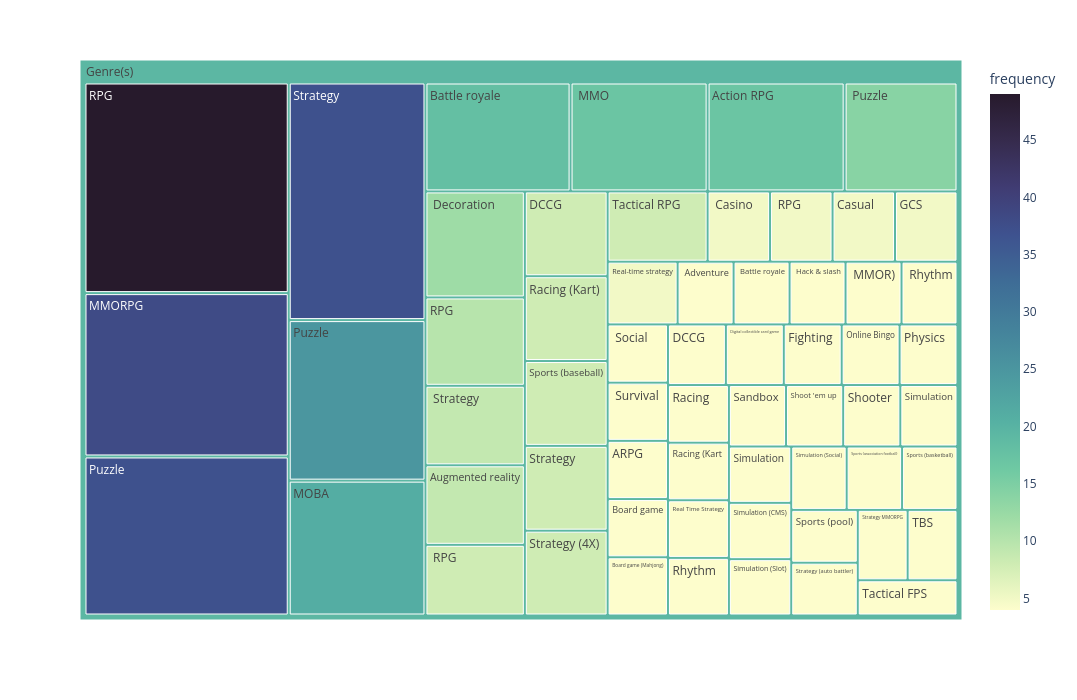

In [205]:
genre_freq.sort_values('frequency', ascending=False)
fig = px.treemap(genre_freq, 
                 path=['group', 'genre'], 
                 color_continuous_scale='deep',
                 values='frequency',color='frequency')

fig.update_layout(width=900, height=700)
fig.show()

fig.write_html(os.path.join(FIG_DIR, 'treemap_genre_freq.html'))

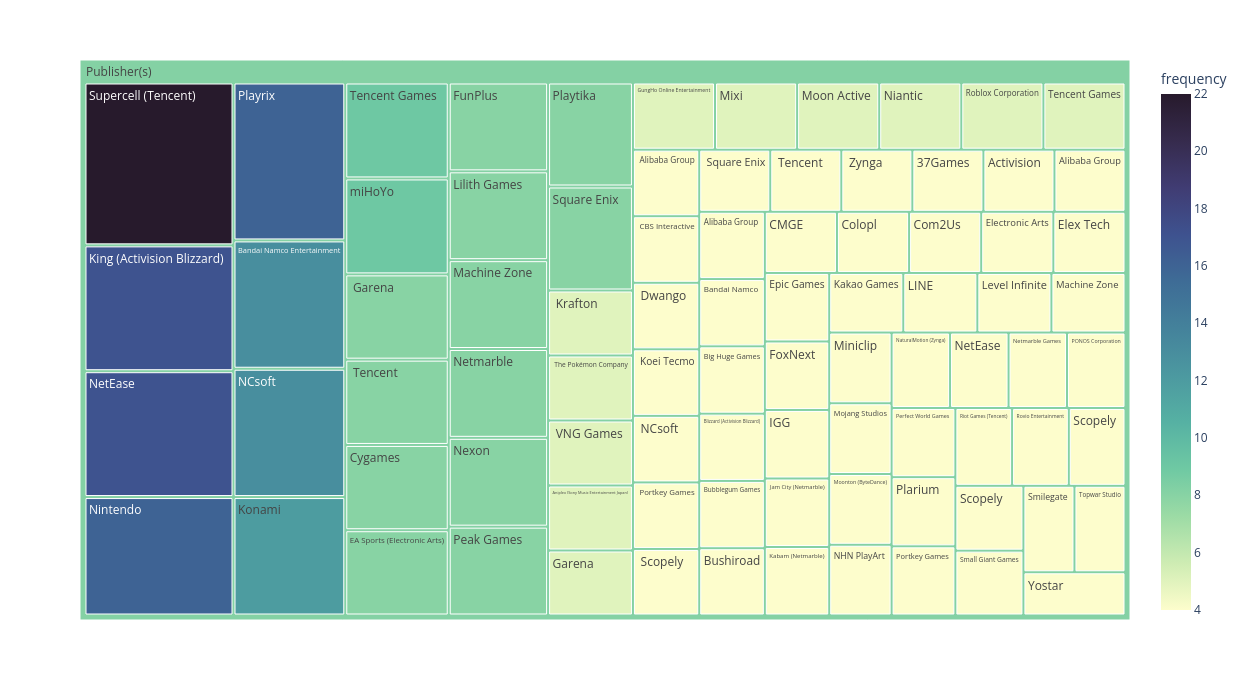

In [206]:
publisher_freq.sort_values('frequency', ascending=False)
fig = px.treemap(publisher_freq, 
                 path=['group', 'publisher'], 
                 color_continuous_scale='deep',
                 values='frequency',color='frequency')

fig.update_layout(width=900, height=700)
fig.show()

fig.write_html(os.path.join(FIG_DIR, 'treemap_publisher_freq.html'))

<h5 id="heading"><span style="background-color:#fad3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">📊 Create genre & publisher Heatmap </span></h5>

In [207]:
genre_roles = hot_df['Publisher(s)'].sum().sort_values().index.tolist()
sorted_publisher = hot_df.drop('Genre(s)', axis=1).sum().sort_values(ascending=False).droplevel(level=0).index.tolist()

In [210]:
genres= []
# For each role, calculate the percentage of each skill
for pub in sorted_publisher:
    # Filter for the role
    pub_mask = (hot_df[('Publisher(s)', pub)] == 1)

    #For each skill column, calculate mean of the one-hot-encoded -> percentage
    genre_role =  hot_df.loc[pub_mask, 'Publisher(s)'].mean() * 100

   # Append to original list
    genres.append(genre_role)
                             
# Concat and format
genres = pd.concat(genres, axis=1)
genres.columns = genre_roles
genres = genres.reset_index(level=0, drop=True)
genres = genres.loc[genre_roles]
genres = genres.T

KeyError: "None of [Index([' Alibaba Group', 'Epic Games', 'FoxNext ', 'Scopely', 'IGG',\n       'Jam City (Netmarble)', 'Kabam (Netmarble)', 'Kakao Games', 'Yostar',\n       'LINE', 'Level Infinite', 'Machine Zone ', 'Miniclip', 'Elex Tech',\n       'Mojang Studios', 'NHN PlayArt ', 'NaturalMotion (Zynga)', 'NetEase ',\n       'Netmarble Games ', 'Smilegate ', 'PONOS Corporation',\n       'Perfect World Games ', 'Plarium', 'Small Giant Games',\n       'Portkey Games ', 'Riot Games (Tencent)', 'Rovio Entertainment',\n       'Moonton (ByteDance)', 'Electronic Arts', 'Scopely ', ' Dwango',\n       ' Scopely', ' Zynga', ' Portkey Games', '37Games', 'Activision ',\n       ' NCsoft', 'Alibaba Group', 'Alibaba Group ', ' Koei Tecmo',\n       ' Square Enix', ' Tencent ', 'Topwar Studio', 'Big Huge Games',\n       'Blizzard (Activision Blizzard)', 'Bubblegum Games', ' CBS Interactive',\n       'Bushiroad', 'CMGE', 'Colopl', 'Com2Us', 'Bandai Namco ', ' Krafton ',\n       'Roblox Corporation', 'Niantic ', 'Moon Active',\n       'GungHo Online Entertainment', 'Garena', 'Tencent Games',\n       'Aniplex (Sony Music Entertainment Japan)', ' VNG Games', 'Mixi',\n       ' The Pokémon Company', 'Square Enix', 'FunPlus', ' Garena', 'Playtika',\n       'Machine Zone', 'Peak Games', 'Cygames', 'Nexon', 'Netmarble',\n       ' Tencent', 'Lilith Games', 'EA Sports (Electronic Arts)',\n       'Tencent Games ', 'miHoYo', 'Konami', 'NCsoft',\n       'Bandai Namco Entertainment', 'Nintendo', 'Playrix', 'NetEase',\n       'King (Activision Blizzard)', 'Supercell (Tencent)'],\n      dtype='object')] are in the [index]"

In [ ]:
skills

In [ ]:
fig = go.Figure(data=go.Heatmap(z=skills, x=skills.columns,y=skills.index, colorscale='magma', ygap=1))
fig.update_layout(width=2500, height=700)
fig.show()
fig.write_html(os.path.join(FIG_DIR, 'heatmap.html'))